In [3]:
# Importar bibliotecas
import json
import numpy as np
import pandas as pd

# WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

# Importar o módulo de classificaçao de sentimentos
from sent_classifier import SnorkelSentimentClassifier

pd.set_option('display.max_colwidth', None)

### 1. Suno Research

In [4]:
# Definir o ticker e importar notícias
ticker = 'B3SA3'

In [5]:
# Verificar o dataset importado
with open(f'../crawlers/suno/results/suno-{ticker.lower()}.json', encoding='utf8') as json_file:
    data = json.load(json_file)

df = pd.DataFrame(data)
df.sample(5)

,topic,title,date,search_date,url,tags
285,Mercado,"B3 (B3SA3): investidores estrangeiros ingressam com R$ 9,7 bi em dezembro",17/12/2020 18:17,2022-05-23 23:02:14,https://www.suno.com.br/noticias/b3-b3sa3-investidor-estrangeiro-ingressa-dezembro/,"[B3 (B3SA3), Investidores estrangeiros]"
498,Mercado,Investimentos nos Estados Unidos: cinco fatores para ter conhecimento,07/06/2019 15:37,2022-05-23 23:08:47,https://www.suno.com.br/noticias/investimento-exterior-conheca-tres-fatores/,"[B3 (B3SA3), Bolsa de Nova York (NYSE), Bolsa de Valores, Estados Unidos (EUA), Nasdaq]"
139,Mercado,"Opções de venda do Ibovespa a 115 mil pontos tiveram maior volume, segundo dados da B3 (B3SA3)",14/10/2021 09:55,2022-05-23 22:58:50,https://www.suno.com.br/noticias/opcoes-venda-ibovespa-115-mil-pontos-dados-b3-b3sa3-vencimento/,"[B3 (B3SA3), Bolsa de Valores, Ibovespa, opções]"
351,Negócios,IRB Brasil (IRBR3) faz parceria com a B3 no setor de seguros,26/10/2020 10:17,2022-05-23 23:05:00,https://www.suno.com.br/noticias/irb-brasil-irbr3-parceria-b3-b3sa3-seguros-resseguros/,"[B3 (B3SA3), IRB Brasil (IRBR3), seguros]"
443,Negócios,B3 (B3SA3): número de investidores ativos se aproxima de 3 milhões,18/09/2020 07:36,2022-05-23 23:05:53,https://www.suno.com.br/noticias/b3-b3sa3-numero-investidores-ativos-3-milhoes/,"[B3 (B3SA3), Bolsa de Valores de São Paulo (B3)]"


In [6]:
# Selecionar dados de 2020 - Presente

# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')

# Set date column as index
df.set_index('date', inplace=True)

# Order by date
df.sort_index(inplace=True)

In [7]:
# Filtrar notícias do tópico 'negócios' para a Suno
# Verificar o similar em MoneyTimes

st_year = '2018'
df = df.loc[st_year:,][df['topic'] == 'Negócios']

In [8]:
df.head()

,topic,title,search_date,url,tags
date,,,,,
2018-11-05 10:34:00,Negócios,Gol aciona Comissão da B3 para listar suas ações no Novo Mercado,2022-05-23 23:10:08,https://www.suno.com.br/noticias/gol-aciona-comissao-b3/,"[Ações, B3 (B3SA3), Bolsa de Valores, Gol Linhas Aéreas (GOLL11/GOLL4), Latam, Smiles (SMLS3)]"
2019-01-11 15:05:00,Negócios,Presidente da B3 diz que vai “brigar” para que XP faça IPO no Brasil,2022-05-23 23:10:28,https://www.suno.com.br/noticias/presidente-b3-brigar-xp-ipo-brasil/,"[B3 (B3SA3), Bolsa de Valores, Nasdaq, XP Investimentos]"
2019-02-08 20:37:00,Negócios,"Vale é intimada a fazer depósito judicial de R$ 7,413 bilhões",2022-05-23 23:08:51,https://www.suno.com.br/noticias/vale-intimada-deposito-judicial/,"[B3 (B3SA3), Brumadinho, Vale (VALE3)]"
2019-02-18 16:26:00,Negócios,"Grupo SBF, dono da rede Centauro, planeja fazer sua abertura de capital",2022-05-23 23:08:52,https://www.suno.com.br/noticias/grupo-sbf-centauro-abertura-capital/,"[Ações, B3 (B3SA3), Bolsa de Valores, IPO (Oferta Inicial de Ações)]"
2019-02-19 13:34:00,Negócios,"Lucro da SBF, dona da Centauro, cai 38% e soma R$ 148,7 mi em 2018",2022-05-23 23:08:52,https://www.suno.com.br/noticias/lucro-sbf-centauro-cai-38-2018/,"[Ações, B3 (B3SA3), balanços trimestrais, Bolsa de Valores]"


In [9]:
sc = SnorkelSentimentClassifier(df=df, source='suno')

In [10]:
# Executar o módulo de classificação de sentimentos
df_results, results = sc.apply_rules(df)

100%|██████████| 1500/1500 [00:00<00:00, 1593.05epoch/s]


In [11]:
# Set values to label classes
scores = {"POSITIVE" : 1,
          "NEUTRAL" : 0,
          "NEGATIVE" : -1}

df_results["label_value"] = df_results["label_class"].map(scores)

In [12]:
# Compute scores per publication
df_results['sent_score'] = df_results['label_value'] * 1

In [13]:
scores = pd.DataFrame(df_results.sent_score)
daily_publications = scores.resample('D').nunique()

for index, row in df_results.iterrows():

    # Get sum of daily scores
    index_dt = index.date()
    count_dt = daily_publications.loc[str(index_dt)].values[0]

    # Set new value for sent_score
    df_results.loc[index, 'sent_score'] = row['sent_score'] / count_dt

In [14]:
df_results.tail(10)

,title,title_raw,search_date,label_class,label_value,sent_score
date,,,,,,
2022-04-18 09:19:00,b3 b3sa3 mantém slc agrícola slce3 na segunda prévia do ibovespa,B3 (B3SA3) mantém SLC Agrícola (SLCE3) na segunda prévia do Ibovespa,2022-05-23 22:58:03,NEUTRAL,0.0,0.000000
2022-05-09 21:40:00,radar ação do nubank nubr33 afunda <NUM> por cento b3 b3sa3 vê queda no volume diário assaí asai3 tem queda de <NUM> por cento no lucro do 1t22,"Radar: ação do Nubank (NUBR33) afunda 16%, B3 (B3SA3) vê queda no volume diário, Assaí (ASAI3) tem queda de 10,8% no lucro do 1T22",2022-05-23 22:56:41,NEGATIVE,-1.0,-1.000000
2022-05-12 21:30:00,b3 b3sa3 lucro líquido recorrente cai <NUM> por cento no 1t22 para <NUM> bi,"B3 (B3SA3): lucro líquido recorrente cai 7,2% no 1T22, para R$ 1,2 bi",2022-05-23 22:55:56,NEUTRAL,0.0,0.000000
2022-05-13 16:20:00,b3 b3sa3 lança índice de ações focado em agronegócio veja lista completa,B3 (B3SA3) lança índice de ações focado em agronegócio; veja lista completa,2022-05-23 22:58:49,NEUTRAL,0.0,0.000000
2022-05-16 09:00:00,fiagro <NUM> por cento dos investidores são pessoas físicas aponta b3 b3sa3,"Fiagro: 98% dos investidores são pessoas físicas, aponta B3 (B3SA3)",2022-05-23 22:58:03,NEUTRAL,0.0,0.000000
2022-05-16 10:39:00,índice do agronegócio estreia na b3 b3sa3 com <NUM> empresas na carteira veja lista,Índice do agronegócio estreia na B3 (B3SA3) com 20 empresas na carteira; veja lista,2022-05-23 22:58:51,NEUTRAL,0.0,0.000000
2022-05-16 18:03:00,b3 b3sa3 lança fundo de <NUM> mi para investir em empresas com potencial de crescimento,B3 (B3SA3) lança fundo de R$ 600 mi para investir em empresas com potencial de crescimento,2022-05-23 22:57:31,POSITIVE,1.0,0.333333
2022-05-16 21:49:00,radar nubank nubr33 reduz prejuízo no 1t22 magazine luiza mglu3 tem balanço pior que o esperado itaúsa itsa4 aumenta lucro e anuncia jcp bilionário,"Radar: Nubank (NUBR33) reduz prejuízo no 1T22, Magazine Luiza (MGLU3) tem balanço pior que o esperado, Itaúsa (ITSA4) aumenta lucro e anuncia JCP bilionário",2022-05-23 22:58:53,NEGATIVE,-1.0,-0.333333
2022-05-19 19:45:00,b3 b3sa3 começa a negociar novo etf de tecnologia da xp asset,B3 (B3SA3) começa a negociar novo ETF de tecnologia da XP Asset,2022-05-23 22:56:57,POSITIVE,1.0,0.500000


In [15]:
converter = lambda x : -1 if x < 0 else (1 if x > 0 else 0)
daily_sent_scores = pd.DataFrame(df_results.sent_score.resample('D').sum().apply(converter))

# Mean Normalization
#daily_sent_scores = (daily_sent_scores - daily_sent_scores.mean()) / daily_sent_scores.std()

# Min-Max Normalization
# daily_sent_scores = (daily_sent_scores-daily_sent_scores.min()) / (daily_sent_scores.max()-daily_sent_scores.min())
daily_sent_scores = daily_sent_scores.shift().dropna()
daily_sent_scores.to_csv(f'../../data/textual/news/suno_daily_sent_scores_{ticker.lower()}.csv')
daily_sent_scores

,sent_score
date,
2018-11-06,0.0
2018-11-07,0.0
2018-11-08,0.0
2018-11-09,0.0
2018-11-10,0.0
...,...
2022-05-15,0.0
2022-05-16,0.0
2022-05-17,0.0


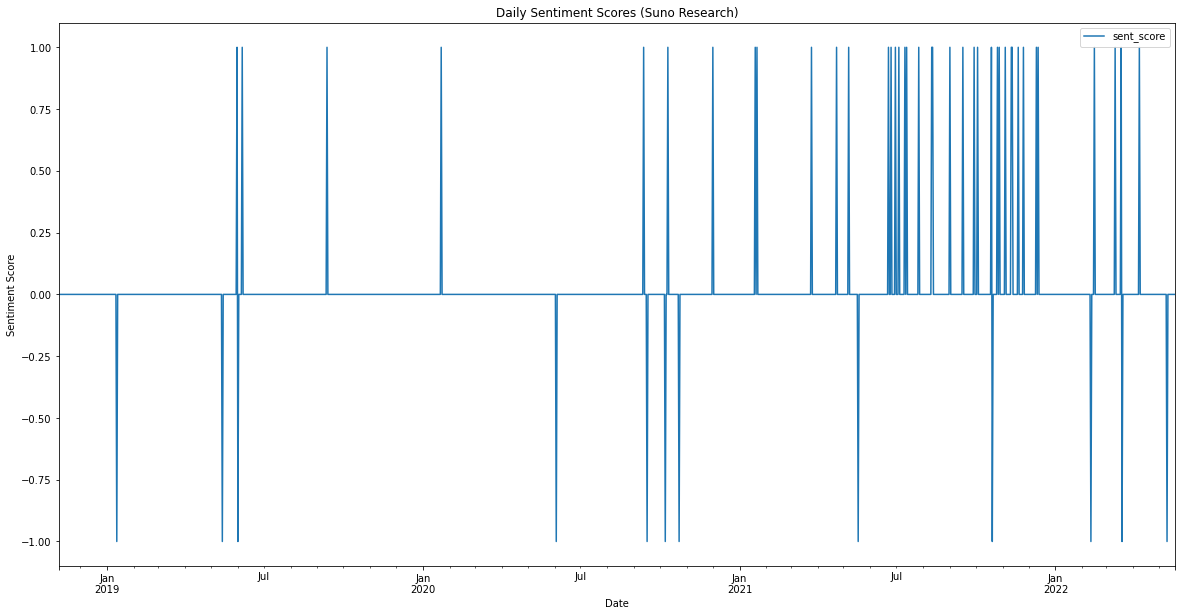

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
daily_sent_scores.plot(ax=ax)
ax.set_title('Daily Sentiment Scores (Suno Research)')
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Score')
plt.show();

In [17]:
df_results.label_class.value_counts()

NEUTRAL     243
POSITIVE     46
NEGATIVE     13
Name: label_class, dtype: int64

In [18]:
results

,j,Polarity,Coverage,Overlaps,Conflicts
lf_news_good_adjs,0,[1],0.080906,0.009709,0.000000
lf_news_good_verbs,1,[1],0.048544,0.019417,0.003236
lf_regex_dividendos,2,[1],0.035599,0.009709,0.000000
lf_regex_resultado_positivo,3,[1],0.025890,0.003236,0.000000
lf_news_bad_adjs,4,[0],0.012945,0.000000,0.000000
lf_news_bad_verbs,5,[0],0.012945,0.000000,0.000000
lf_regex_resultado_negativo,6,[0],0.019417,0.003236,0.003236


---

### WordClouds

In [19]:
def generate_wordcloud(samples, sentiment, source):

    # Use a image as mask if source is twitter
    twitter_mask = np.array(Image.open("./wordclouds/twitter_mask.png"))

    # concatenar as palavras
    all_words = " ".join(s for s in samples)

    # ver quantidade de palavras
    print("Quantidade de Palavras: {}".format(len(all_words)))

    # lista de stopword
    stopwords = set(STOPWORDS)

    stopwords.update(["de", "e", "a", "um", "que", "com",
                    "só", "da", "do", "m", "a", "ou", "já",
                    "ok", "esse", "ma", "i", "mais", "mas",
                    "não", "meu", "pra", "eu", "uma", "um", 
                    "na", "no", "me", "tem", "em", "por",
                    "ele", "essa", "esse", "se", "vc", "para",
                    "vai", "muito", "minha", "meu", "ele", "ela",
                    "como", "sem", "tá", "dia", "você", "queria",
                    "aqui", "era", "as", "pq", "hoje", "seu", "gente", 
                    "nem", "como", "agora", "os", "quando", "foi", 
                    "isso", "casa", "ser", "ter", "cara", "vou", "NUM"])

    # gerar uma wordcloud
    wordcloud = WordCloud(stopwords=stopwords,
                        background_color="white",
                        max_words=1000,
                        mask=twitter_mask if source == 'twitter' else None,
                        width=1600, 
                        height=800,
                        contour_width=2,
                        collocations=False,
                        contour_color='#1da1f2').generate(all_words)

    # mostrar a imagem final
    fig, ax = plt.subplots(figsize=(15,10))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_axis_off()

    plt.imshow(wordcloud);
    
    # salvar a imagem final
    wordcloud.to_file(f"wordclouds/{source}_{sentiment}_wordcloud.png")

    plt.show();

#### Positive Suno

In [20]:
positive_samples = df_results[df_results['label_class'] == 'POSITIVE']['title'].tolist()

Quantidade de Palavras: 3942


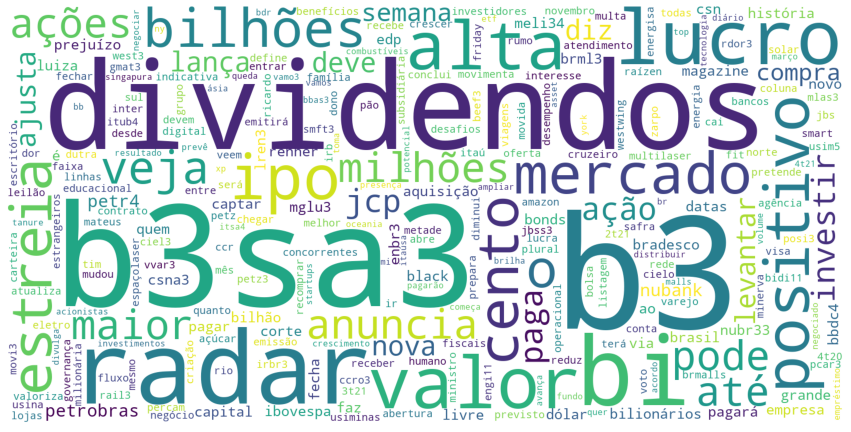

In [21]:
generate_wordcloud(positive_samples, 'positive', 'suno')

#### Negative Suno

In [22]:
negative_samples = df_results[df_results['label_class'] == 'NEGATIVE']['title'].tolist()

Quantidade de Palavras: 1019


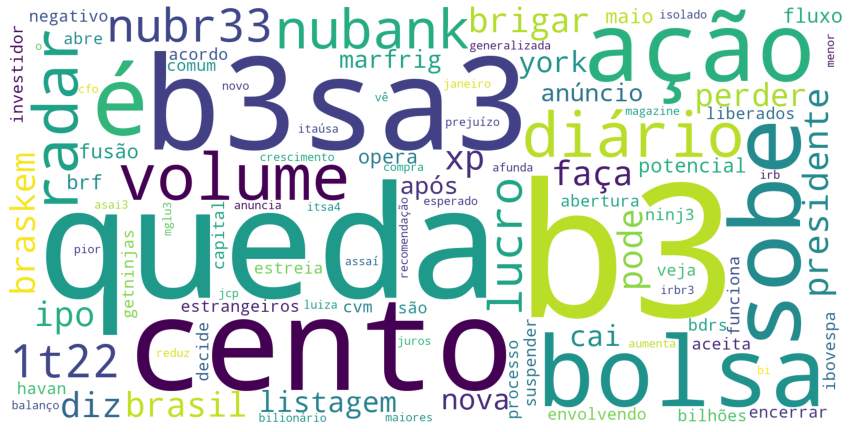

In [23]:
generate_wordcloud(negative_samples, 'negative', 'suno')

---

## Twitter

In [24]:
# Verificar o dataset importado

try:
    with open(f'../crawlers/twitter/results/{ticker}.json', encoding='utf8') as json_file:
        data = json.load(json_file)

    df = pd.DataFrame(data)
    df.sample(5)
except:
    df = pd.DataFrame()

if df.empty:
    print('Zero results from Twitter')

In [25]:
sc = SnorkelSentimentClassifier(df=df, source='twitter')

In [26]:
# Executar o módulo de classificação de sentimentos
df_results, results = sc.apply_rules(df)

100%|██████████| 1500/1500 [00:00<00:00, 1746.81epoch/s]


In [27]:
# Convert date to datetime format
df_results['date'] = pd.to_datetime(df_results['created_at'], format='%Y-%m-%d %H:%M:%S')

# Set date column as index
df_results.set_index('date', inplace=True)

# Order by date
df_results.sort_index(inplace=True)

# Since 'st_year'
df_results = df_results.loc[st_year:,]

In [28]:
df_results.tail(10)

,title,title_raw,created_at,search_dt,rt_count,favorite_count,label_class
date,,,,,,,
2022-04-27 19:44:09,hub de educação financeira da b3 completa dois anos hoje assista ao para saber mais sobre o que você pode encontrar por lá se você quiser fazer parte dos mais de <NUM> mil usuários do hub e aprender mais sobre finança acesse,Hub de Educação Financeira da B3 completa dois anos hoje\nAssista ao #minutoB3 para saber mais sobre o que você pode encontrar por lá.\nSe você quiser fazer parte dos mais de 190 mil usuários do Hub e aprender mais sobre finança acesse https://t.co/9ZGAcxJbOa. https://t.co/7DsVkmu1Nh,2022-04-27 19:44:09,2022-05-03 14:17:34,2,25,NEUTRAL
2022-04-28 11:18:22,na nova masterclass da b3 a vai te ensinar tudo de mais importante para você ir além da poupança do tesouro direto e outros investimentos tradicionais da renda fixa,"Na nova masterclass da B3, a @mariliadf2 vai te ensinar tudo de mais importante para você ir além da poupança, do Tesouro Direto e outros investimentos tradicionais da renda fixa. https://t.co/S6Oo1MnPWV",2022-04-28 11:18:22,2022-05-03 14:17:34,1,15,NEUTRAL
2022-04-28 17:44:31,você sabia que a partir de segunda passa a valer a nova carteira do ibov e hoje nós divulgamos a sua terceira prévia vem conferir como ela ficou,"Você sabia que a partir de segunda-feira, passa a valer a nova carteira do Ibov? E hoje, nós divulgamos a sua terceira prévia. Vem conferir como ela ficou: \nhttps://t.co/x5W9Dlvhys",2022-04-28 17:44:31,2022-05-03 14:17:34,2,14,NEUTRAL
2022-04-28 21:18:28,hoje a b3 divulgou a terceira previa do ibovespa e demais índices além disso recebemos a 1ª edição da arena infracast promovida pela hiria e pelo infracast com o apoio da b3 tudo completo no,"Hoje a B3 divulgou a terceira previa do Ibovespa e demais índices. Além disso, recebemos a 1ª edição da Arena Infracast, promovida pela Hiria e pelo Infracast com o apoio da B3.\n\nTudo completo no #MinutoB3 💙\n\n#ibovespa \n\nhttps://t.co/SEuTKSs4lo",2022-04-28 21:18:28,2022-05-03 14:17:34,1,19,POSITIVE
2022-04-29 14:28:55,a b3 aderiu hoje ao fórum de empresas e direitos lgbti reforçando seu compromisso com a promoção da diversidade saiba mais,"A B3 aderiu hoje ao Fórum de Empresas e Direitos LGBTI+, reforçando seu compromisso com a promoção da diversidade. Saiba mais: https://t.co/aZJr3Bh1TV",2022-04-29 14:28:55,2022-05-03 14:17:34,2,12,NEUTRAL
2022-04-29 17:08:45,acontece hoje na b3 o leilão promovido pelas prefeituras de cachoeiro de itapemirim es e toledo pr do projeto de parceria públicoprivada ppp para a iluminação pública dos municípios,"Acontece hoje, na B3, o leilão promovido pelas prefeituras de Cachoeiro de Itapemirim (ES) e Toledo (PR) do projeto de Parceria Público-Privada (PPP) para a iluminação pública dos municípios.",2022-04-29 17:08:45,2022-05-03 14:17:34,2,16,NEUTRAL
2022-04-29 20:10:02,a b3 aderiu ao fórum de empresas e direitos lgbti reforçando seu compromisso com a promoção da diversidade além disso divulgamos uma parceria com o nubank para uma jornada de aprendizado tudo isso e o resumo da semana no,"A B3 aderiu ao Fórum de Empresas e Direitos LGBTI+, reforçando seu compromisso com a promoção da diversidade. Além disso, divulgamos uma parceria com o Nubank para uma jornada de aprendizado.\n\nTudo isso e o resumo da semana no #MinutoB3 💙\n\nhttps://t.co/FfhpvA7tB3",2022-04-29 20:10:02,2022-05-03 14:17:34,1,13,NEUTRAL
2022-05-02 16:27:38,a partir de hoje o ibov e os demais índices da b3 têm uma nova carteira de ações você já sabe quais são as empresas que agora fazem parte do principal índice da bolsa confira aqui,"A partir de hoje, o Ibov e os demais índices da B3 têm uma nova carteira de ações. Você já sabe quais são as empresas que agora fazem parte do principal índice da bolsa? Confira aqui: https://t.co/DNzSpyE3Xj",2022-05-02 16:27:38,2022-05-03 14:17:34,2,22,NEUTRAL
2022-05-02 17:52:29,o apresentou hoje aqui na b3 sua ambição <NUM> iniciativa composta movimentos criados para acelerar as metas da agenda <NU

In [29]:
df_results.label_class.value_counts()

NEUTRAL     1029
POSITIVE     346
NEGATIVE       7
Name: label_class, dtype: int64

In [30]:
results

,j,Polarity,Coverage,Overlaps,Conflicts
lf_news_good_adjs,0,[1],0.151844,0.030369,0.015184
lf_news_good_verbs,1,[1],0.068691,0.020246,0.005785
lf_regex_dividendos,2,[1],0.000723,0.000000,0.000000
lf_regex_resultado_positivo,3,[1],0.010846,0.003615,0.002892
lf_news_bad_adjs,4,[0],0.042661,0.015184,0.015184
lf_news_bad_verbs,5,[0],0.006508,0.001446,0.001446
lf_regex_resultado_negativo,6,[0],0.013738,0.004338,0.004338


### WordClouds

#### Positive Twitter

In [31]:
positive_samples = df_results[df_results['label_class'] == 'POSITIVE']['title'].tolist()

Quantidade de Palavras: 66994


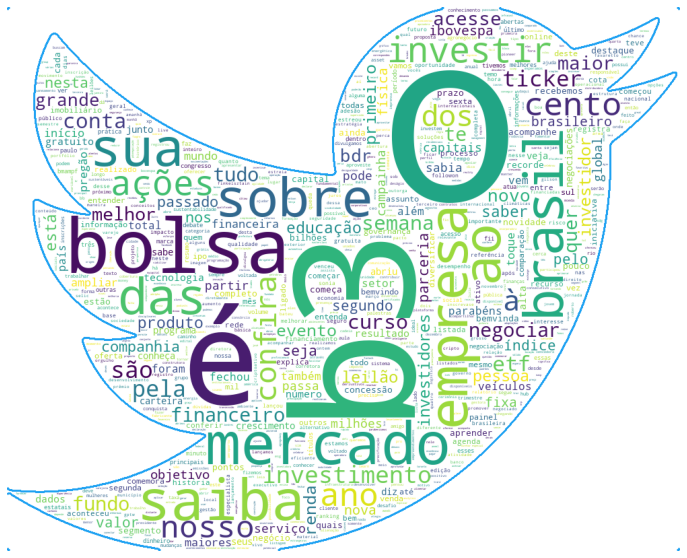

In [32]:
generate_wordcloud(positive_samples, 'positive', 'twitter')

#### Negative Twitter

In [33]:
negative_samples = df_results[df_results['label_class'] == 'NEGATIVE']['title'].tolist()

Quantidade de Palavras: 1264


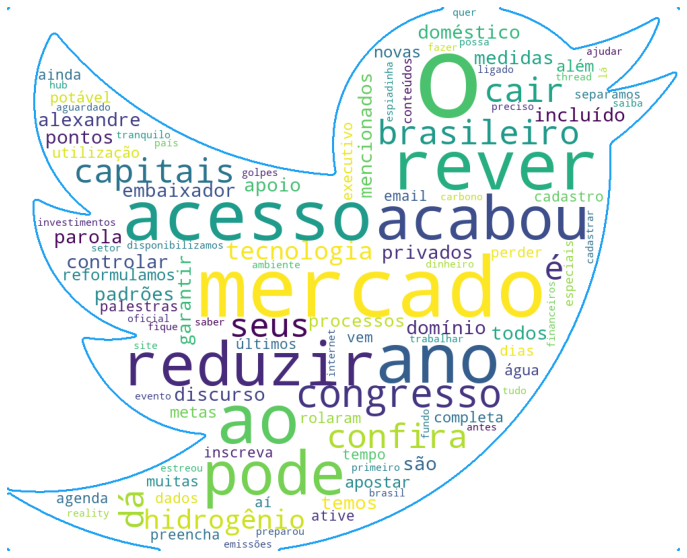

In [34]:
generate_wordcloud(negative_samples, 'negative', 'twitter')

---

### Aggregate Sentiment Scores

#### Using RTs e Favorite Count

In [35]:
df_results.head(2)

,title,title_raw,created_at,search_dt,rt_count,favorite_count,label_class
date,,,,,,,
2018-02-20 20:20:31,registra novo recorde e marca <NUM> pontos saiba mais,#Ibovespa registra novo recorde e marca 85.803 pontos. Saiba mais: https://t.co/U5eiu7PRIV https://t.co/I2cmb2QRTz,2018-02-20 20:20:31,2022-05-03 14:17:47,7,29,NEUTRAL
2018-02-20 20:22:08,breaks new record and reaches <NUM> points learn more,#Ibovespa breaks new record and reaches 85.803 points. Learn more: https://t.co/S86WJ1czu4,2018-02-20 20:22:08,2022-05-03 14:17:47,0,12,NEUTRAL


In [36]:
# Set values to label classes
scores = {"POSITIVE" : 1,
          "NEUTRAL" : 0,
          "NEGATIVE" : -1}

df_results["label_value"] = df_results["label_class"].map(scores)

In [37]:
df_results.head(2)

,title,title_raw,created_at,search_dt,rt_count,favorite_count,label_class,label_value
date,,,,,,,,
2018-02-20 20:20:31,registra novo recorde e marca <NUM> pontos saiba mais,#Ibovespa registra novo recorde e marca 85.803 pontos. Saiba mais: https://t.co/U5eiu7PRIV https://t.co/I2cmb2QRTz,2018-02-20 20:20:31,2022-05-03 14:17:47,7,29,NEUTRAL,0.0
2018-02-20 20:22:08,breaks new record and reaches <NUM> points learn more,#Ibovespa breaks new record and reaches 85.803 points. Learn more: https://t.co/S86WJ1czu4,2018-02-20 20:22:08,2022-05-03 14:17:47,0,12,NEUTRAL,0.0


In [38]:
# Compute scores per publication
df_results['sent_score'] = df_results['label_value'] * (10 * df_results['rt_count']) + df_results['favorite_count']

In [39]:
df_results.head(10)

,title,title_raw,created_at,search_dt,rt_count,favorite_count,label_class,label_value,sent_score
date,,,,,,,,,
2018-02-20 20:20:31,registra novo recorde e marca <NUM> pontos saiba mais,#Ibovespa registra novo recorde e marca 85.803 pontos. Saiba mais: https://t.co/U5eiu7PRIV https://t.co/I2cmb2QRTz,2018-02-20 20:20:31,2022-05-03 14:17:47,7,29,NEUTRAL,0.0,29.0
2018-02-20 20:22:08,breaks new record and reaches <NUM> points learn more,#Ibovespa breaks new record and reaches 85.803 points. Learn more: https://t.co/S86WJ1czu4,2018-02-20 20:22:08,2022-05-03 14:17:47,0,12,NEUTRAL,0.0,12.0
2018-02-21 19:14:30,registra novo recorde e marca <NUM> pontos sais mais,#Ibovespa registra novo recorde e marca 86.051 pontos. Sais mais: https://t.co/WBiq4mVEg8,2018-02-21 19:14:30,2022-05-03 14:17:47,6,17,NEUTRAL,0.0,17.0
2018-02-21 19:14:59,breaks new record and reaches <NUM> points learn more,"#Ibovespa breaks new record and reaches 86,051 points. Learn more: https://t.co/hCrlClX9qH",2018-02-21 19:14:59,2022-05-03 14:17:47,0,3,NEUTRAL,0.0,3.0
2018-02-22 19:23:28,registra novo recorde e marca <NUM> pontos saiba mais,#Ibovespa registra novo recorde e marca 86.686 pontos. Saiba mais: https://t.co/G0BhcVd12y https://t.co/PkoC24jT1w,2018-02-22 19:23:28,2022-05-03 14:17:47,9,26,NEUTRAL,0.0,26.0
2018-02-22 19:24:16,breaks new record and reaches <NUM> points learn more,"#Ibovespa breaks new record and reaches 86,686 points. Learn more: https://t.co/Czbud69siy",2018-02-22 19:24:16,2022-05-03 14:17:47,4,13,NEUTRAL,0.0,13.0
2018-02-27 10:36:20,emissão de coe em quatro anos superou o total de <NUM> bi saiba mais,Emissão de COE em quatro anos superou o total de R$ 31 bi. Saiba mais: https://t.co/kCI6IJy0Ak,2018-02-27 10:36:20,2022-05-03 14:17:47,2,1,POSITIVE,1.0,21.0
2018-02-27 19:49:22,lançamento da versão em inglês do feed rss do suporte à negociação da b3 saiba mais,Lançamento da Versão em Inglês do Feed RSS do Suporte à Negociação da B3. Saiba mais: https://t.co/e8WtRrnYoZ,2018-02-27 19:49:22,2022-05-03 14:17:47,1,3,NEUTRAL,0.0,3.0
2018-02-28 14:25:42,b3 informa resultado da licitação da sinfra para concessão de prestação de serviços de rodovias estaduais de mato grosso saiba mais,B3 informa resultado da licitação da SINFRA para concessão de prestação de serviços de rodovias estaduais de Mato Grosso. Saiba mais: https://t.co/lUcn4dOu6D,2018-02-28 14:25:42,2022-05-03 14:17:47,1,1,POSITIVE,1.0,11.0


In [40]:
scores = pd.DataFrame(df_results.sent_score)
daily_publications = scores.resample('D').nunique()

for index, row in df_results.iterrows():
    # Get sum of daily scores
    index_dt = index.date()
    count_dt = daily_publications.loc[str(index_dt)].values[0]

    # Set new value for sent_score
    df_results.loc[index, 'sent_score'] = row['sent_score'] / count_dt

In [42]:
converter = lambda x : -1 if x < 0 else (1 if x > 0 else 0)
daily_sent_scores = pd.DataFrame(df_results.sent_score.resample('D').sum().apply(converter))

# Mean Normalization
# daily_sent_scores = (daily_sent_scores - daily_sent_scores.mean()) / daily_sent_scores.std()

# Min-Max Normalization
# daily_sent_scores = (daily_sent_scores-daily_sent_scores.min())/(daily_sent_scores.max()-daily_sent_scores.min())
daily_sent_scores = daily_sent_scores.shift().dropna()
daily_sent_scores.to_csv(f'../../data/textual/twitter/twitter_daily_sent_scores_{ticker.lower()}.csv')
daily_sent_scores

,sent_score
date,
2018-02-21,1.0
2018-02-22,1.0
2018-02-23,1.0
2018-02-24,0.0
2018-02-25,0.0
...,...
2022-04-28,1.0
2022-04-29,1.0
2022-04-30,1.0


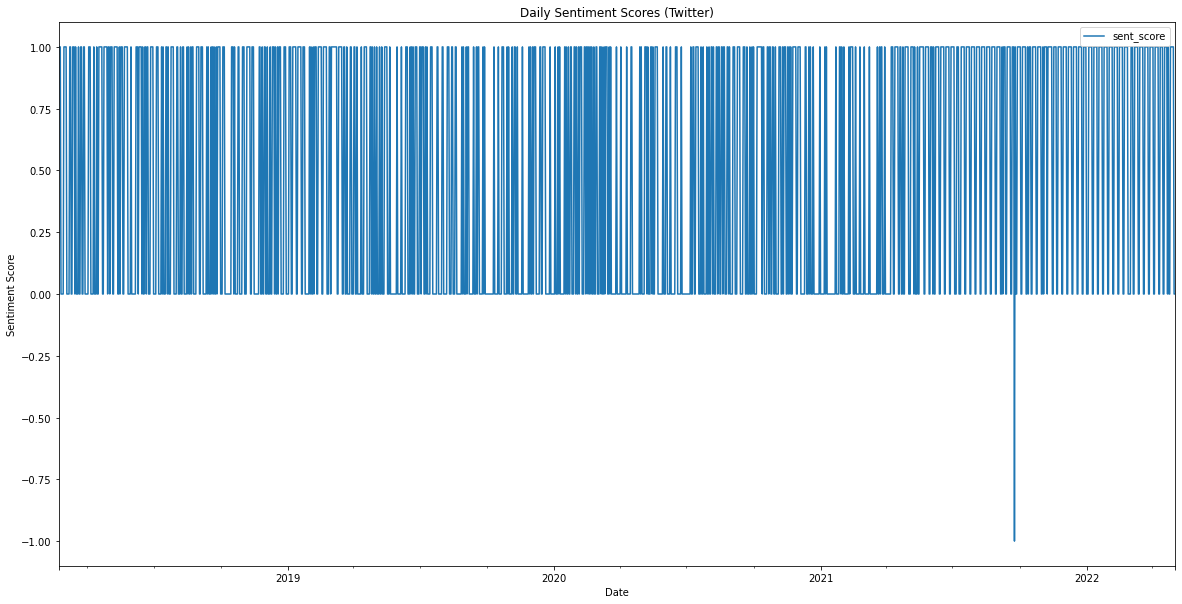

In [43]:
fig, ax = plt.subplots(figsize=(20,10))
daily_sent_scores.plot(ax=ax)
ax.set_title('Daily Sentiment Scores (Twitter)')
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Score')
plt.show();

---